In [1]:
#TO EXCTRACT DOSAGE: bcftools plugin dosage -r 2:127614931-128114931  /data1/antoine/genome_seq/ALL.chr2.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz > ijbhisdbvs.tsv
import glob
import re
import os
import sys
import kipoi
import numpy as np
import datetime
import warnings
import pandas as pd
sys.argv=[" ","9_37034476",5000,"PAX5",1,100,500000]

exp=pd.read_csv("/home/antoine/2_127864931.tsv",sep="\t")
dos=pd.read_csv("/home/antoine/2_127864931_dosage_simple.tsv",sep="\t",low_memory=False,index_col=1)

dos.columns = [re.sub('\[[0-9]*\]','',x) for x in list(dos)]

with open("/home/antoine/link_epi_to_expr/list_commun_patients") as f:
    list_p = f.readlines()

list_p = [x.strip() for x in list_p]
#for x in range(len(list_p)):
#    list_p[x] = list_p[x].split()

In [2]:
#print(np.shape(content))
#print(np.shape(content2))
#print(np.shape(content2[1:][4:]))

In [3]:
expression=pd.DataFrame(np.empty([1,445]), columns=list_p)
dosage=pd.DataFrame(np.empty([dos.shape[0],445]), columns=list_p , index=list(dos.index))
for patient in list_p:
    expression[patient]=exp[patient]
    dosage[patient]=dos[patient].astype(str).astype(float)

In [4]:
#dosage=pd.DataFrame(np.empty([dos.shape[0],445]), columns=list_p , index=dos['POS'])
#dosage[patient]=dos[patient].astype(str).astype(float)
print(dosage)
print(expression)
#print(dos[patient])

           HG00096  HG00097  HG00099  HG00100  HG00101  HG00102  HG00103  \
127614972      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
127615009      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
127615018      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
127615059      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
127615182      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
127615240      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
127615250      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
127615254      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
127615314      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
127615375      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
127615478      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
127615508      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
127615511   

In [5]:
correlations=np.corrcoef(dosage,expression)

/home/antoine/miniconda3/envs/kipoi-gpu-DeepSEA__predict/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/antoine/miniconda3/envs/kipoi-gpu-DeepSEA__predict/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: divide by zero encountered in true_divide
  c /= stddev[None, :]
/home/antoine/miniconda3/envs/kipoi-gpu-DeepSEA__predict/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [6]:
#print(expression,dosage)
print(correlations[-1])

[nan nan nan ... nan nan  1.]


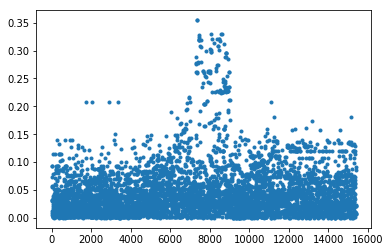

In [17]:
import matplotlib.pyplot as plt 
plt.plot(abs(correlations[-1][:-1]),'.')
plt.savefig('foo.png')

In [12]:
plt.show()

In [9]:
#np.corrcoef(np.transpose(expression),dosage)[-1][:-1]